In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import box, Point

Plotting Graph of Delhi from geojson data

<Axes: >

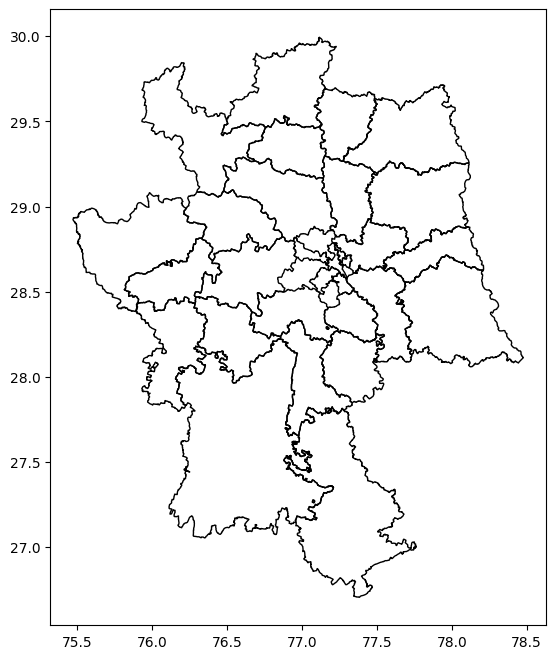

In [2]:
Delhi = gpd.read_file("/Users/kashvimishrasingh/Downloads/Scenario-1/dataset/delhi_ncr_region.geojson").to_crs(epsg=4326)
# Plot GeoJSON
fig, ax = plt.subplots(figsize=(8, 8))
Delhi.plot(ax=ax, edgecolor="black", facecolor="none")

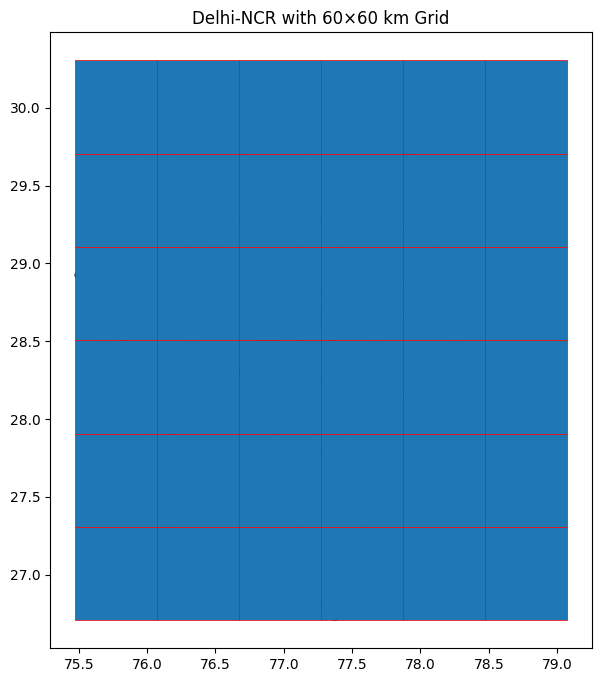

In [3]:
minx, miny, maxx, maxy = Delhi.total_bounds
grid_size = 0.6
grid_cells = []
for x in np.arange(minx, maxx, grid_size):
    for y in np.arange(miny, maxy, grid_size):
        grid_cells.append(box(x, y, x + grid_size, y + grid_size))

grid = gpd.GeoDataFrame(geometry=grid_cells, crs="EPSG:4326")

fig, ax = plt.subplots(figsize=(8, 8))
Delhi.plot(ax=ax, edgecolor="black", facecolor="none")
grid.plot(ax=ax, edgecolor="red", linewidth=0.5)

plt.title("Delhi-NCR with 60×60 km Grid")
plt.show()

In [4]:
import leafmap

In [5]:
Map = leafmap.Map(center=[28.6, 77.2], zoom=8)
Map.add_basemap("Esri.WorldImagery")

Map.add_gdf(grid, layer_name="Grid")
Map

Map(center=[28.6, 77.2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out…

In [13]:
points = []

for cell in grid.geometry:
    minx, miny, maxx, maxy = cell.bounds

    # Four corners
    points.extend([
        Point(minx, miny),
        Point(minx, maxy),
        Point(maxx, miny),
        Point(maxx, maxy)
    ])

    # Center
    points.append(cell.centroid)

points_gdf = gpd.GeoDataFrame(geometry=points, crs="EPSG:4326")

In [14]:
image_centers = [
    Point(77.1, 28.7),
    Point(77.5, 28.9),
    Point(78.2, 29.4),
    Point(76.5, 27.9)
]

images_gdf = gpd.GeoDataFrame(
    geometry=image_centers,
    crs="EPSG:4326"
)

In [15]:
filtered_images = gpd.sjoin(
    images_gdf,
    grid,
    predicate="within"
)

In [17]:
print("Images before filtering:", len(images_gdf))
print("Images after filtering:", len(filtered_images))

Images before filtering: 4
Images after filtering: 4


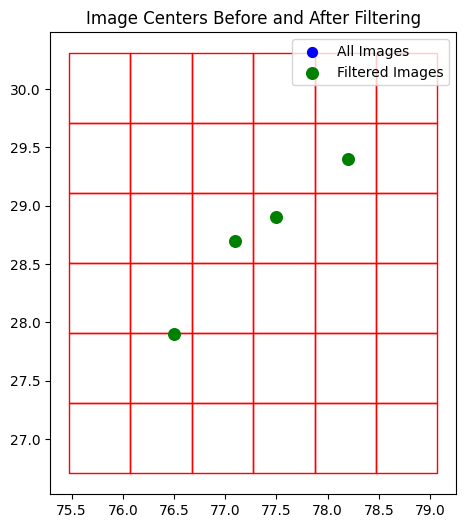

In [23]:
fig, ax = plt.subplots(figsize=(6, 6))

grid.plot(ax=ax, edgecolor="red", facecolor="none")
images_gdf.plot(ax=ax, color="blue", markersize=50, label="All Images")
filtered_images.plot(ax=ax, color="green", markersize=70, label="Filtered Images")

plt.legend()
plt.title("Image Centers Before and After Filtering")
plt.show()